In [2]:
import numpy as np
import torch

In [3]:
a = np.random.rand(100)
b = torch.tensor(a)

In [4]:
n_s = np.split(a, 5)
n_t = torch.split(b, 20)

In [5]:
n_s[0] == n_t[0].numpy()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [6]:
import itertools

In [7]:
def splitImage(image, use_path=False, wh=(512, 512), mode='image'):
    '''
        Splits a large image into smaller sized images
        e.g. 2048X2048 image => 16 X (512X512) images
        Args:
            image : tensor of image sized 3XwXh
            use_path : for using path or image
            wh : output dimension of splits
            mode : 'image' or 'mask'
    '''
    
    out_w, out_h = wh
    
    if mode=='image':
        _, w, h = image.shape
        image = torch.split(image, out_w, dim=1)
        image = list(itertools.chain.from_iterable([torch.split(img, out_h, dim=2) for img in image]))
    else:
        w, h = image.shape
        image = torch.split(image, out_w, dim=0)
        image = list(itertools.chain.from_iterable([torch.split(img, out_h, dim=1) for img in image]))
    return image

In [8]:
# Split for image

image = torch.rand([3, 2048, 2048])
image = splitImage(image)
print(len(image))
print(image[0].shape)

16
torch.Size([3, 512, 512])


In [9]:
mask = torch.rand([2048, 2048])
mask = splitImage(mask, mode='mask')
print(len(mask))
print(mask[0].shape)

16
torch.Size([512, 512])


In [10]:
import sys
sys.path.append('../')

In [11]:
from utils.parameters import color2index
from data.transforms import transform
from data.dataset import SegmentDataset
from utils.vis import *

H, W = 1024, 1024
val_annot = '../assets/val.txt'
val_set = SegmentDataset(
    annot=val_annot, 
    transform=transform, 
    dim=(H, W), 
    c2i=color2index
)


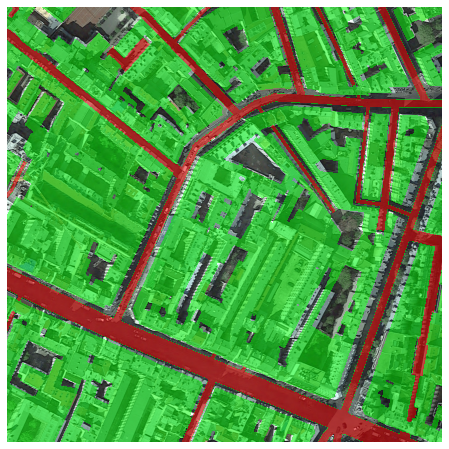

torch.Size([3, 1024, 1024])
torch.Size([1024, 1024])


In [12]:
_, _, img, mask = val_set[0]
showImageMask(img.permute(1, 2, 0), mask, use_path=False, debug=True, overlay=True)

print(img.shape)
print(mask.shape)

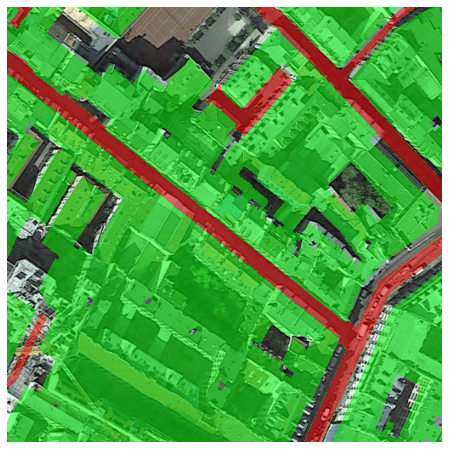

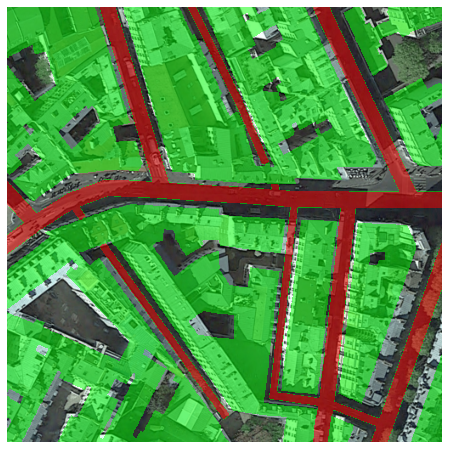

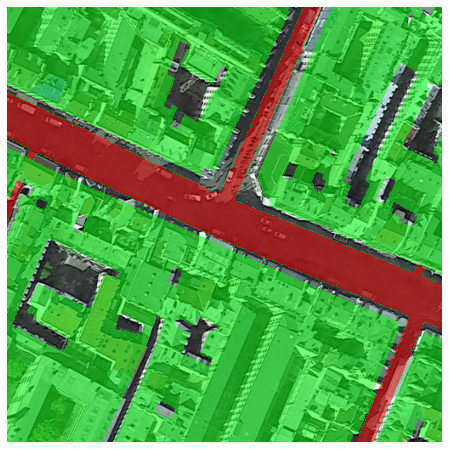

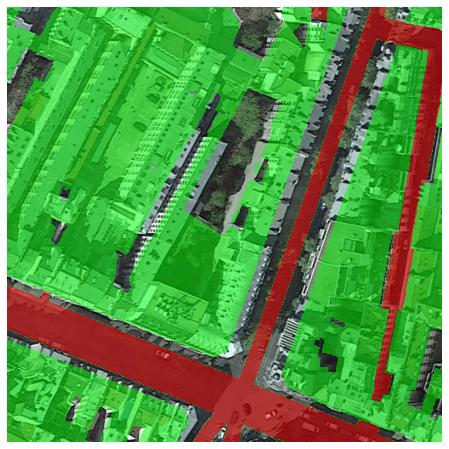

In [13]:
imgs, masks = splitImage(img), splitImage(mask, mode='mask')
for img, mask in zip(imgs, masks):
    showImageMask(img.permute(1, 2, 0), mask, use_path=False, debug=True, overlay=True)
